Digit Recognition Using Machine Learning
Here is a small example for recognizing digit. We call the model as Samkhya. There is no need to install any software. We use Colab Notebook With Google login, go to colab.research.google.com You can run the code below, block by block.

images.png

In [1]:
from tensorflow.keras import datasets,layers,models,Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D
import matplotlib.pyplot as plt

In [2]:
(TrainIn, TrainOut), (TestIn, TestOut) = datasets.mnist.load_data()
TrainIn = TrainIn.reshape(60000,28,28,1)
TestIn = TestIn.reshape(10000,28,28,1)
TrainOut = to_categorical(TrainOut)
TestOut = to_categorical(TestOut)


11501568/11490434 [==============================] - 0s 0us/step


In [3]:
Samkhya = Sequential()
#add Convolution  Layers
Samkhya.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(28,28,1),name='c1'))
Samkhya.add(MaxPooling2D(pool_size=(2, 2)))
Samkhya.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(28,28,1),name='c2'))
Samkhya.add(MaxPooling2D(pool_size=(2, 2)))


# Add Flatten/Dense Layers
Samkhya.add(Flatten(name='F1'))
Samkhya.add(Dense(10, activation='softmax',name='D1'))

Samkhya.compile(optimizer='sgd', loss='mse', metrics=['accuracy'])

In [4]:
print(Samkhya.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
c1 (Conv2D)                  (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
c2 (Conv2D)                  (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
F1 (Flatten)                 (None, 1600)              0         
_________________________________________________________________
D1 (Dense)                   (None, 10)                16010     
Total params: 53,578
Trainable params: 53,578
Non-trainable params: 0
____________________________________________________

In [5]:
TrainingLog=Samkhya.fit(TrainIn, TrainOut,epochs=10, validation_split=0.1)

Epoch 1/10
1688/1688 [==============================] - 70s 41ms/step - loss: 0.0682 - accuracy: 0.6354 - val_loss: 0.0291 - val_accuracy: 0.8388
Epoch 2/10
1688/1688 [==============================] - 69s 41ms/step - loss: 0.0271 - accuracy: 0.8460 - val_loss: 0.0251 - val_accuracy: 0.8542
Epoch 3/10
1688/1688 [==============================] - 69s 41ms/step - loss: 0.0234 - accuracy: 0.8618 - val_loss: 0.0228 - val_accuracy: 0.8628
Epoch 4/10
1688/1688 [==============================] - 69s 41ms/step - loss: 0.0213 - accuracy: 0.8671 - val_loss: 0.0210 - val_accuracy: 0.8643
Epoch 5/10
1688/1688 [==============================] - 69s 41ms/step - loss: 0.0196 - accuracy: 0.8711 - val_loss: 0.0199 - val_accuracy: 0.8663
Epoch 6/10
1688/1688 [==============================] - 69s 41ms/step - loss: 0.0184 - accuracy: 0.8739 - val_loss: 0.0193 - val_accuracy: 0.8677
Epoch 7/10
1688/1688 [==============================] - 69s 41ms/step - loss: 0.0175 - accuracy: 0.8770 - val_loss: 0.0183 -

# **Testing the Digit Recognition**

In [6]:
import  PIL, google.colab  
from PIL import  ImageEnhance , ImageOps  
from tensorflow.keras.preprocessing.image import img_to_array

In [7]:
Samkhya.evaluate(TestIn, TestOut)

313/313 [==============================] - 4s 12ms/step - loss: 0.0163 - accuracy: 0.8789


[0.0163416750729084, 0.8788999915122986]

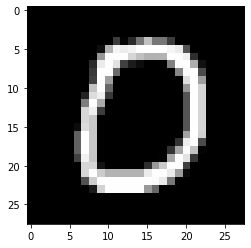

In [8]:
plt.imshow(TestIn[10].reshape(28, 28),cmap='gray')

In [9]:
pred = Samkhya.predict(TestIn[10].reshape(1, 28, 28, 1))
print("The Samkhya predicted is",pred.argmax())

The Samkhya predicted is 0


Let us try uploading handwrtitten digits from laptop/system

In [32]:
# load the hand written image  from your Desktop/Laptop
google.colab.files.upload()


Saving nine1.png to nine1.png


{'nine1.png': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x033\x00\x00\x01\xcc\x08\x02\x00\x00\x00n\x92a\x04\x00\x00\x00\x01sRGB\x00\xae\xce\x1c\xe9\x00\x00\x00\x04gAMA\x00\x00\xb1\x8f\x0b\xfca\x05\x00\x00\x00\tpHYs\x00\x00\x0e\xc3\x00\x00\x0e\xc3\x01\xc7o\xa8d\x00\x00\nMIDATx^\xed\xd6\xc1\x8e\xe38\x02D\xc1\xfe\xff\x9f\x9e\x05\xa6\xdf\x02\x03\xd8\x94\xa9\xaa\x92D\xa9"\x8eV&M\xde\xf2\x0f\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\

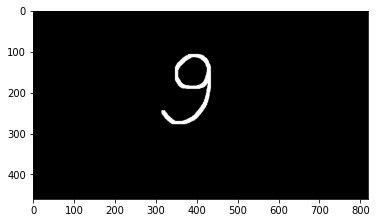

In [34]:
aksharam = PIL.Image.open('nine1.png')
plt.imshow(aksharam)

(28, 28)

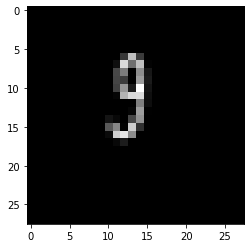

In [35]:
aksharam1 = ImageOps.grayscale(aksharam)  
plt.imshow(aksharam1,cmap='gray')
newsize = (28, 28) 
aksharam2=aksharam1.resize(newsize)
plt.imshow(aksharam2,cmap='gray')
aksharam2.size

In [36]:
aksharam3= img_to_array(aksharam2)
aksharam3= aksharam3.reshape(1, 28, 28, 1)
predictions = Samkhya.predict(aksharam3)
print("The Samkhya predicted is",predictions.argmax())

The Samkhya predicted is 9
